In [294]:
import json
credentials = {}
credentials['CONSUMER_KEY']='CmUFCOUyEzvxrEhqzNy53kmyI'
credentials['CONSUMER_SECRET']='Ng9Ba13ZESXoYzVeJFPF9tubzGWoBiwlX7Iel3g24YSSZMnjLo'
credentials['ACCESS_TOKEN']='858595670961168384-p3e6wCGBDIQdalrkuIAZXxL38k2UQqo'
credentials['ACCESS_SECRET']='81erDNIpDkSGsmIh7uR3yvcjru7Wen0lkOKQ9x6R9a74W'
with open("twitter_credentials.json", "w") as file: 
    json.dump(credentials , file)




In [295]:
from twython import Twython

python_tweets = Twython('CmUFCOUyEzvxrEhqzNy53kmyI', 'Ng9Ba13ZESXoYzVeJFPF9tubzGWoBiwlX7Iel3g24YSSZMnjLo')
query= { 'q' : 'COVID_19 Vaccine',
'result_type': 'popular', 
'count': 10 ,
'lang': 'en',
}
sample_return = python_tweets.search(**query)
import csv
def process_tweet(tweet):
    d={}
    d['hashtag'] = [hashtag['text'] for  hashtag in tweet['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user']= tweet['user']['screen_name']
    d['user_loc'] = tweet['user']['location']
    d['Time']=tweet["created_at"]
    return d
    

print(process_tweet(sample_return))

KeyError: 'entities'

In [2]:
from twython import TwythonStreamer
import csv
import json
def process_tweet(tweet):
    d={}
    d['hashtag'] = [hashtag['text'] for  hashtag in tweet['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user']= tweet['user']['screen_name']
    d['user_loc'] = tweet['user']['location']
    d['Time']=tweet["created_at"]
    d['source_device'] = tweet['source']
    d['verification'] = tweet['user']['verified']
    if "place" in tweet and tweet ["place"] != None:
        d['place'] = tweet["place"]["bounding_box"]["coordinates"][0][0]
    return d

class MyStreamer(TwythonStreamer):
    def on_success(self, data):
        if data['lang'] =='en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)

    def on_error(self, status_code , data, x):
        print(status_code , data)
        self.disconnect()

    def save_to_csv(self, tweet):
        with open(r'/Users/ali/Desktop/Lessons/saved_tweets12.csv' , 'a'  , encoding='utf_8') as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))

import json
stream = MyStreamer('CmUFCOUyEzvxrEhqzNy53kmyI', 'Ng9Ba13ZESXoYzVeJFPF9tubzGWoBiwlX7Iel3g24YSSZMnjLo' , '858595670961168384-p3e6wCGBDIQdalrkuIAZXxL38k2UQqo' , '81erDNIpDkSGsmIh7uR3yvcjru7Wen0lkOKQ9x6R9a74W')
stream.statuses.filter(track = 'ukraine')

KeyboardInterrupt: 

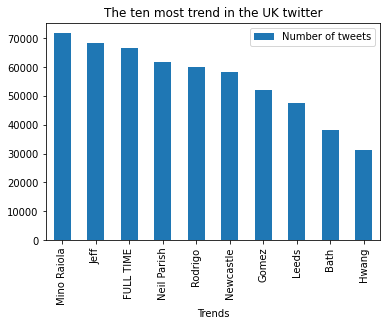

In [4]:
import json
from twython import Twython
import pandas as pd
import matplotlib.pyplot as plt
python_tweets = Twython('CmUFCOUyEzvxrEhqzNy53kmyI', 'Ng9Ba13ZESXoYzVeJFPF9tubzGWoBiwlX7Iel3g24YSSZMnjLo')
li = Twython.get_place_trends(python_tweets , id = 23424975)

l1 = li[0]
li = l1['trends']
MostTrend= {}

for i in range (0 , 50):
    MostTrend.update({li[i]['name']: li[i]['tweet_volume']})
    i += 1
    
data_frame = pd.DataFrame(MostTrend.items(), columns=['Trends', 'Number of tweets'])

C_data_frame= data_frame.dropna()
C_data_frame = C_data_frame.sort_values(by="Number of tweets" , ascending=False)
Ten_BTrends=C_data_frame[0:10]
Ten_BTrends.plot.bar(x='Trends', y='Number of tweets', title="The ten most trend in the UK twitter")


plt.savefig('trend1.jpeg', bbox_inches='tight')

In [ ]:
import json
from twython import Twython
import pandas as pd
import matplotlib.pyplot as plt
python_tweets = Twython('CmUFCOUyEzvxrEhqzNy53kmyI', 'Ng9Ba13ZESXoYzVeJFPF9tubzGWoBiwlX7Iel3g24YSSZMnjLo')
li = Twython.get_available_trends(python_tweets , id = 1 )
print(li)

In [311]:
import gmplot
import webbrowser
tower = gmplot.GoogleMapPlotter(53.349805, -6.26026, 3 )
lat = [53.349805, 53.798799717653516, 53.81555058669799, 53.816817399799255]
lon = [-6.26026, -3.017688250741286, -3.054423785823612, -3.0554322964380516]
tower.heatmap(lat, lon)
tower.draw( "/Users/ali/Desktop/1.html" )
webbrowser.open_new_tab("/Users/ali/Desktop/1.html")
print(type(lat[1]))


<class 'float'>


In [312]:
import gmplot
import webbrowser
lat= []
lon= []
place = pd.read_csv()
for i in range ( 0 , len(place)):
    a = place[i].split(',')
    lat.append(float(a[1]))
    lon.append(float(a[0]))
    i+=1

focus = gmplot.GoogleMapPlotter(53.349805, -6.26026, 3 )
focus.heatmap(lat, lon)
focus.draw( "/Users/ali/Desktop/1.html" )
webbrowser.open_new_tab("/Users/ali/Desktop/1.html")
    

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

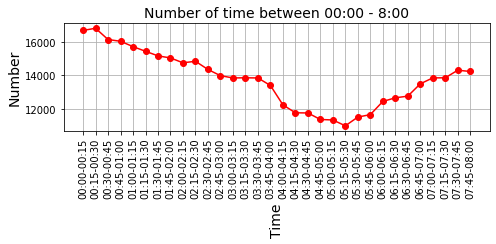

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
Time = pd.read_csv('/Users/ali/Desktop/WSP/time.csv')
x=[]
for i in range (0 , len(Time)):
    x.append(Time['Time'][i])
    i+=1

y=[]
for j in range (0 , len(Time)):
    y.append(Time['Number'][j])
    j+=1
    
plt.plot ( x ,  y  , color='red', marker='o')
plt.title('Number of time between 00:00 - 8:00', fontsize=14)
plt.xticks(rotation=90)
plt.xlabel('Time', fontsize=14 , rotation='vertical')
plt.ylabel('Number', fontsize=14)
plt.grid(True)
plt.show()



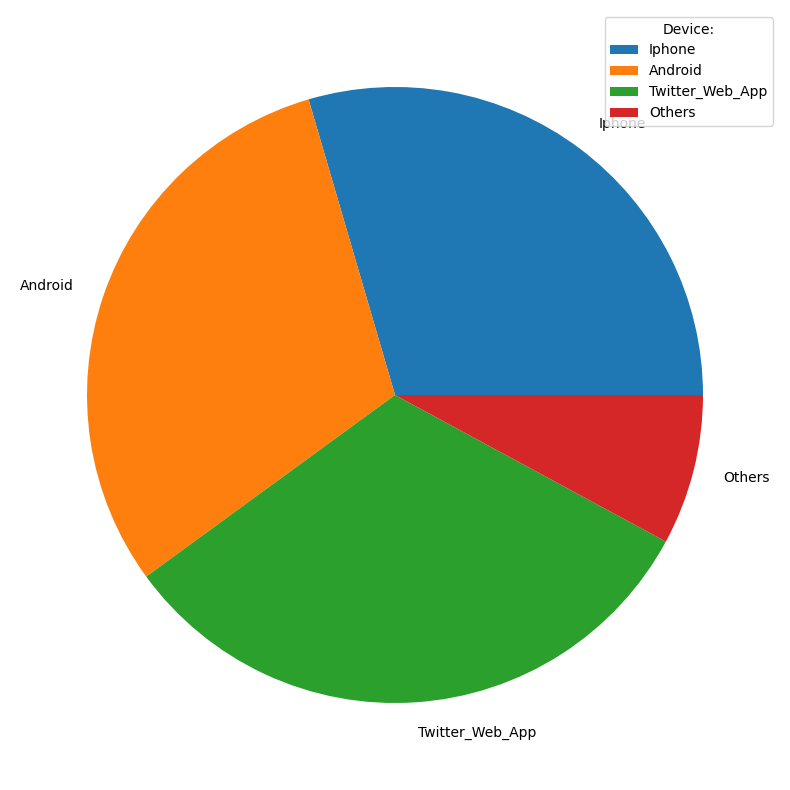

<Figure size 1000x800 with 0 Axes>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
x = pd.read_csv('/Users/ali/Desktop/Lessons/saved_tweets1.csv')
x= x['source_device']
Iphone = 0
Android= 0
Twitter_Web_App =0
Others = 0
for i in range (0 , len(x)):
    if x[i]== '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        Iphone += 1
    elif x[i]== '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>':
        Android += 1
    elif x[i] == '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>':
        Twitter_Web_App += 1
    else:
        Others += 1 
    i+=1

labels = 'Iphone', 'Android', 'Twitter_Web_App', 'Others'
sizes = [Iphone, Android, Twitter_Web_App, Others]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

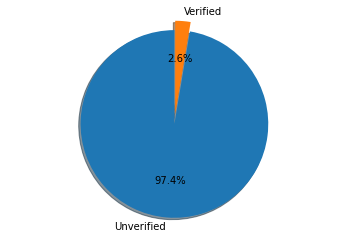

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
x = pd.read_csv('/Users/ali/Desktop/Lessons/saved_tweets1.csv')
Con= x['verified']
Verified = 0
Unverified= 0
for i in range (0 , len(Con)):
    if Con[i] == 0:
        Unverified += 1
    elif Con[i] == 1:
        Verified += 1 
    i+=1



labels = 'Unverified', 'Verified'
sizes = [Unverified, Verified,]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
print(Con[1])




0


In [ ]:
Con[1]
if x == 54 :
    print("hello")


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
x = pd.read_csv('/Users/ali/Desktop/Lessons/saved_tweets1.csv')
x= x['source_device']

In [ ]:
import pandas as pd
import re
from textblob import TextBlob
Data = pd.read_csv('/Users/ali/Desktop/WSP/saved_tweets.csv')
Text = Data["texts"]
Possitive = 0
Neutral= 0
Negative = 0

Possitive_text  = []
Neutral_text = []
Negative_text = []
for i in range (0 ,len(Text)):
    x = TextBlob(Text[i])
    sentimental = x.sentiment.polarity
    i+=1
    if sentimental >0:
        Possitive+=1
        Possitive_text.append(Text[i])
    elif sentimental == 0:
        Neutral+=1
        Neutral_text.append(Text[i]) 
    else:
        Negative+=1
        Negative_text.append(Text[i])



In [ ]:
import matplotlib.pyplot as plt
Name = ["Possitive" , "Neutral" , "Negative"]
Numbers = [Possitive , Neutral , Negative]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Name , Numbers, color ='maroon')
plt.show()


In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import wordcloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
stop_wrods = set(stopwords.words("english"))
Words=[]
for i in range (0 , len(Negative_text)):
    x= nltk.word_tokenize(Negative_text[i])
    Words.append(x)
    i+=1
filtered_words= []
for j in range(0 , len(Words)):
    for w in Words[j]:
        j+=1
        if w not in stop_wrods:
            filtered_words.append(w)

for i in range(0 , len(filtered_words)):
    filtered_words[i] = filtered_words[i].lower()

frequency_dist = nltk.FreqDist(filtered_words)
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse= True)[0:30]
large_words = dict([(k,v) for k , v in frequency_dist.items() if len(k) > 3 ] )

frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30,cumulative=False)

wordcloud = WordCloud(max_font_size=50, max_words=100,
background_color="black").generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")



In [ ]:
import matplotlib.pyplot as plt
Name = ["Possitive" , "Neutral" , "Negative"]
Numbers = [Possitive , Neutral , Negative]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Name , Numbers, color ='maroon')
plt.show()